<a href="https://colab.research.google.com/github/Farivini/Classificador_de-_senha_com_streamlit/blob/main/Classificador_senhas_streamlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador de senha com Machine Learning
+ 

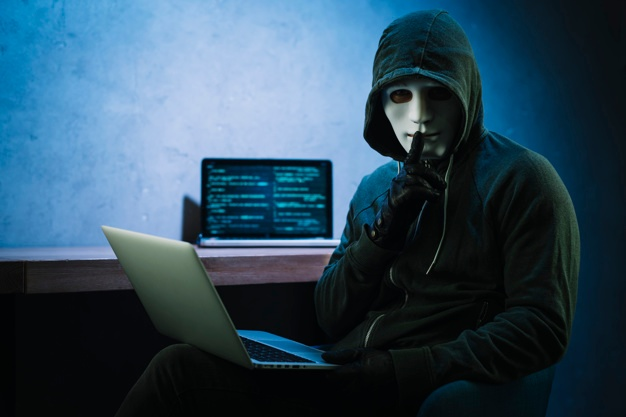

## Como o titulo sugere vamos implementar e treinar Machine Learning para classificar senhas e dizer se é forte ou não.

In [9]:

import pandas as pd
import numpy as np

In [10]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [12]:
# Carregar tabela com senhas 
df = pd.read_csv("/content/sample_data/cleanpasswordlist.csv")

# Vamos analisar apenas o cabeçalho

In [13]:
df.head()

,Unnamed: 0,password,strength
0,0,kzde5577,1
1,1,kino3434,1
2,2,visi7k1yr,1
3,3,megzy123,1
4,4,lamborghin1,1


## -> Conseguimos ver que para senhas fortes e coloca como 1

In [14]:
df = df[['password', 'strength']]

In [15]:
# EDA
df.shape

(669425, 2)

In [16]:
df.describe()

,strength
count,669425.000000
mean,0.990217
std,0.507936
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [17]:
df.columns

Index(['password', 'strength'], dtype='object')

### Vamos checar quais valores são nulos

In [19]:

df.isnull().sum()

password    1
strength    0
dtype: int64

### Checamos e contamos quantos são fortes e fracos

In [20]:
# Check Value Counts for Strength
df['strength'].value_counts()

1    496650
0     89662
2     83113
Name: strength, dtype: int64

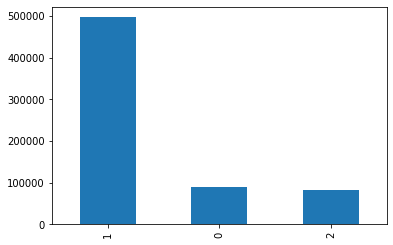

In [21]:
df['strength'].value_counts().plot(kind='bar')

In [23]:
# Tamanho das senhas
df['password'].str.len().idxmax()

26951

In [24]:
df.iloc[26951]

password    In0LnUoff8wfayJGqzelyDqg4AMl9gBhgl3T2iZeONzh5g...
strength                                                    2
Name: 26951, dtype: object

In [25]:
df['password'].str.len().idxmin()

459739

In [27]:
df['password'] = df['password'].fillna('unknown')

In [28]:
xfeatures = df['password']
ylabels = df['strength']

In [29]:
df['password']

0             kzde5577
1             kino3434
2            visi7k1yr
3             megzy123
4          lamborghin1
              ...     
669420      10redtux10
669421       infrared1
669422    184520socram
669423       marken22a
669424        fxx4pw4g
Name: password, Length: 669425, dtype: object

In [30]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(xfeatures)

In [32]:
# Aqui aplicamos Split no daata frame
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

# Criando nosso modelo

### Optei por colocar Binary Logistic Regression

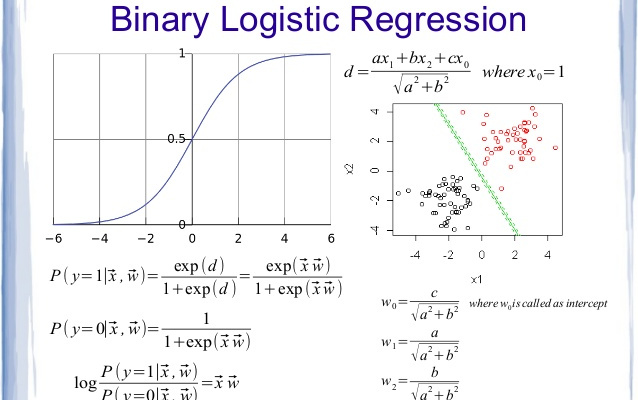

In [34]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
print("Accuracy :",logit.score(X_test, y_test))

Accuracy : 0.7444629234967236


In [36]:


X_predict1 = ['password',
             'pYthonqwas'
             'faizanahmad',
             'password##',
             'ajd1348#28t**',
             'ffffffffff',
             'kuiqwasdi',
             '123456',
             'abcdef']

X_predict1 = vectorizer.transform(X_predict1)
y_Predict1 = logit.predict(X_predict1)
print(y_Predict1)



[1 1 1 1 1 1 1 1]


In [40]:
penalty ='l2'

In [41]:
multi_class='ovr'

In [42]:
import joblib

# Carrego os modelos para implementar

In [54]:
logit_model = open("logit_senhas_model.pkl","wb")
joblib.dump(logit,logit_model)
logit_model.close()


In [57]:
pswd_cv = open("pswd_cv.pkl","wb")
joblib.dump(vectorizer,pswd_cv)
pswd_cv.close()


## Escolho naive bayes porque:
### Classificador Naive Bayes para modelos multinomiais

### O classificador multinomial Naive Bayes é adequado para classificação com recursos discretos (por exemplo, contagem de palavras para classificação de texto). A distribuição multinomial normalmente requer contagens de recursos inteiros. No entanto, na prática, contagens fracionárias como tf-idf também podem funcionar.

In [46]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
nv = MultinomialNB()
nv.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [48]:
print("Accuracy :",nv.score(X_test, y_test))

Accuracy : 0.7445425936622383


In [49]:

X_predict1 = ['password',
             'pYthonqwas'
             'faizanahmad',
             'password##',
             'ajd1348#28t**',
             'ffffffffff',
             'kuiqwasdi',
             '123456',
             'abcdef']

In [50]:
X_predict2 = vectorizer.transform(X_predict1)


In [51]:
y_Predict2 = nv.predict(X_predict2)
print(y_Predict2)

[1 1 1 1 1 1 1 1]


In [53]:
nv_model = open("naive_senhas_model.pkl","wb")
joblib.dump(nv,nv_model)
nv_model.close()